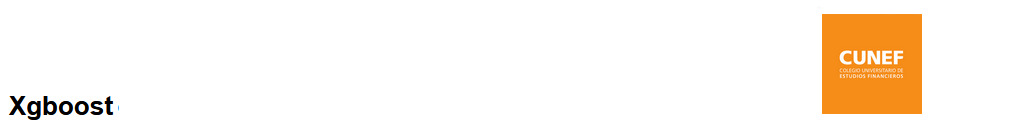

<table text-align="left"; style="width: 100%;"  >
<tbody>

<tr text-align="center">
<td width="19%" bgcolor="orange" ><FONT FONT SIZE="+1" COLOR="WHITE">Autores</FONT>&nbsp;</td>
<td width="73%" bgcolor="WHITE" align="center"><FONT FONT SIZE="+1" COLOR="ORANGE" >Correo</FONT>&nbsp;</td>
</tr>

<tr>
<td>&nbsp;</td>
<td> &nbsp;</td>
<td> &nbsp;</td>
<td>&nbsp;</td>
</tr>
<tr>
<td width="5%"; bgcolor="orange" border = "4"><FONT FONT SIZE="+0.2" COLOR="WHITE">Valentina Díaz Torres</FONT>&nbsp;</td>
<td width="5%"; bgcolor="WHITE"><FONT FONT SIZE="+0.5" COLOR="ORANGE">Valentina.diaz@cunef.edu</FONT>&nbsp;</td>
</tr>

<tr>
<td width="5%"; bgcolor="orange"><FONT FONT SIZE="+0.2" COLOR="WHITE">Francisco del Val Yague</FONT>&nbsp;</td>

<td width="5%"; bgcolor="WHITE"><FONT FONT SIZE="+0.5" COLOR="ORANGE">Francisco.delval@cunef.edu</FONT>&nbsp;</td>
</tr>
<tr>
<td width="5%"; bgcolor="orange"><FONT FONT SIZE="+0.5" COLOR="WHITE">Alejandro García Girón</FONT>&nbsp;</td>

<td width="5%"; bgcolor="WHITE"><FONT FONT SIZE="+0.5" COLOR="ORANGE">A.garciagiron@cunef.edu</FONT>&nbsp;</td>
</tr>
    
</tbody>
</table>

In [11]:
import sys
sys.path.append("../00_eda_ingeniera_variables")

from eda_ingenieria_de_variable import *

FileNotFoundError: [Errno 2] No such file or directory: '../../data/01_raw/Loan_training_set_1_4.csv'

---------------------

## XGBOOST MODEL

---

**1. Definición**

XGBoost es una implementación de código abierto popular y eficiente del algoritmo de gradiente de árboles reforzados. Gradient boosting es un algoritmo de aprendizaje supervisado, que intenta predecir con precisión una variable objetivo combinando las estimaciones de un conjunto de modelos más simples y débiles.

**2. Librerias**

In [6]:
# data frame 
import pandas as pd
import numpy as np


!pip install xgboost pandas sklearn
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt 

# sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score,roc_curve, plot_roc_curve,classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# guardar modelo
import pickle

**3. Training - Test**

In [9]:
#Separamos la variable target del resto del dataset
X = data.drop(['loan_status_Paga'],axis=1) 

#Analogamente que arriba pero esta vez obviamos el resto de la target
Y = data['loan_status_Paga'] 


 # 80% Train 20% Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

KeyError: "['loan_status_Paga'] not found in axis"

**4. Modelo XGBOOST**

In [6]:

%%time
estimator = xgb.XGBClassifier(n_estimators=1000)
                                                                                                                         
estimator.fit(X_train, Y_train)

ValueError: DataFrame.dtypes for data must be int, float, bool or categorical.  When
                categorical type is supplied, DMatrix parameter
                `enable_categorical` must be set to `True`.emp_length, home_ownership

In [8]:
#acemos la prediccion del modelo
pred = estimator.predict(X_test)
print(pred)

ValueError: DataFrame.dtypes for data must be int, float, bool or categorical.  When
                categorical type is supplied, DMatrix parameter
                `enable_categorical` must be set to `True`.emp_length, home_ownership

In [7]:
#evaluamos la precisión del mismo
accuracy_score(Y_test, pred)

0.9008751717348739

**4.Matrices de Confusión**

In [54]:
confusion_matrix(Y_test, pred)

array([[ 6038, 17142],
       [ 5493, 63766]], dtype=int64)

**Matriz de Confusión**

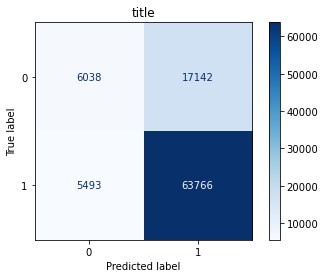

In [57]:
disp = plot_confusion_matrix(estimator, X_test, Y_test,
                                 #display_labels= Y,
                                 cmap=plt.cm.Blues);
disp.ax_.set_title('Matriz de confusión');

In [2]:
**Matriz de Confusión normalizada**

SyntaxError: invalid syntax (<ipython-input-2-fc5a5f379518>, line 1)

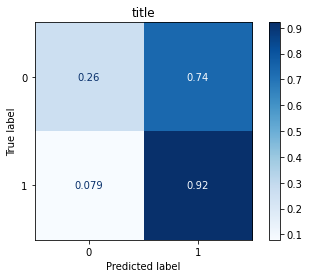

In [58]:
disp = plot_confusion_matrix(estimator, X_test, Y_test,
                                 #display_labels= Y,
                                 cmap=plt.cm.Blues,
                                 normalize= 'true');
disp.ax_.set_title('Matriz de confusion normalizada');

In [ ]:
A diferencia de la anterior que nos expresa el número por casos esta nos los devuelve en tanto por uno lo cual se presenta como más intuitivo

**Curva ROC**

Esta es una representación gráfica de la sensibilidad frente a la especificidad para un sistema clasificador binario según se varía el umbral de discriminación.

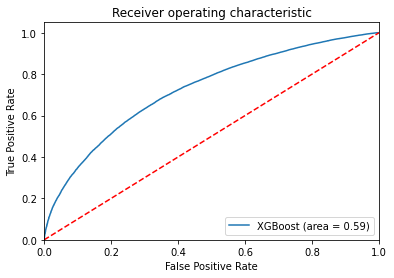

In [61]:
logit_roc_auc = roc_auc_score(Y_test, estimator.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, estimator.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGBoost')
plt.show()

**Estadísticos**

In [60]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.52      0.26      0.35     23180
           1       0.79      0.92      0.85     69259

    accuracy                           0.76     92439
   macro avg       0.66      0.59      0.60     92439
weighted avg       0.72      0.76      0.72     92439



**Guardado del Modelo**

In [8]:
model = estimator
filename = 'XGB.sav'
pickle.dump(model, open(filename, 'wb'))